In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import seaborn as sns
sns.set()  #  Will import Seaborn functionalities
# we don't like warnings
# you can comment the following 2 lines if you'd like to
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Disply all Columns
pd.options.display.max_columns=70

In [3]:
Invistico_Airline = pd.read_csv('Invistico_Airline_v3_claimsV4.csv')#.drop('Unnamed: 0', axis = 1)
Invistico_Airline

,Unnamed: 0,satisfaction,age,seat_comfort,inflight_entertainment,on_board_service,leg_room_service,baggage_handling,checkin_service,cleanliness,online_boarding,gender_male,customer_type_disloyal_customer,type_of_travel_personal_travel,class_eco,class_eco_plus
0,0,1,65,0,4,3,0,3,5,3,2,0,0,1,1,0
1,1,1,47,0,2,4,4,4,2,3,2,1,0,1,0,0
2,2,1,15,0,0,3,3,4,4,4,2,0,0,1,1,0
3,3,1,60,0,4,1,0,1,4,1,3,0,0,1,1,0
4,4,1,70,0,3,2,0,2,4,2,5,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,129875,1,29,5,5,3,3,4,4,4,2,0,1,1,1,0
129876,129876,0,63,2,1,2,3,3,1,2,1,1,1,1,0,0
129877,129877,0,69,3,2,4,3,4,2,3,2,1,1,1,1,0
129878,129878,0,66,3,2,3,2,3,2,1,2,1,1,1,1,0


In [4]:
Invistico_Airline = Invistico_Airline.drop('Unnamed: 0', axis = 1)
Invistico_Airline

,satisfaction,age,seat_comfort,inflight_entertainment,on_board_service,leg_room_service,baggage_handling,checkin_service,cleanliness,online_boarding,gender_male,customer_type_disloyal_customer,type_of_travel_personal_travel,class_eco,class_eco_plus
0,1,65,0,4,3,0,3,5,3,2,0,0,1,1,0
1,1,47,0,2,4,4,4,2,3,2,1,0,1,0,0
2,1,15,0,0,3,3,4,4,4,2,0,0,1,1,0
3,1,60,0,4,1,0,1,4,1,3,0,0,1,1,0
4,1,70,0,3,2,0,2,4,2,5,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,1,29,5,5,3,3,4,4,4,2,0,1,1,1,0
129876,0,63,2,1,2,3,3,1,2,1,1,1,1,0,0
129877,0,69,3,2,4,3,4,2,3,2,1,1,1,1,0
129878,0,66,3,2,3,2,3,2,1,2,1,1,1,1,0


In [5]:
Invistico_Airline['satisfaction'].value_counts(normalize=True)

1    0.547328
0    0.452672
Name: satisfaction, dtype: float64

In [8]:
X = Invistico_Airline.drop('satisfaction', axis = 1) # axis = 1 (look in columns) OR axis = 0 (look in rows)
    
y = Invistico_Airline.satisfaction

###  Data split & Scaling Data Preprocessing

In [9]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
#from sklearn.cross_validation import train_test_split
training_features, test_features, training_target, test_target, = train_test_split(X,y, test_size = .2, random_state = 42)


In [12]:
print(training_features.shape)
print(test_features.shape)
print(training_target.shape)
print(test_target.shape)

(103904, 14)
(25976, 14)
(103904,)
(25976,)


In [10]:
from sklearn.dummy import DummyClassifier

dummy_baseline = DummyClassifier(strategy = 'most_frequent')

dummy_baseline.fit(test_features, test_target)

DummyClassifier(strategy='most_frequent')

In [14]:
score = dummy_baseline.score(test_features, test_target)
print("The fraction of correct classification is :{:5.3f}".format(score))

The fraction of correct classification is :0.551


[0.07981904 0.1619171  0.25459424 0.06841637 0.06330329 0.04630534
 0.04378062 0.04128446 0.06123369 0.04790602 0.05175042 0.04019599
 0.03235986 0.00713356]


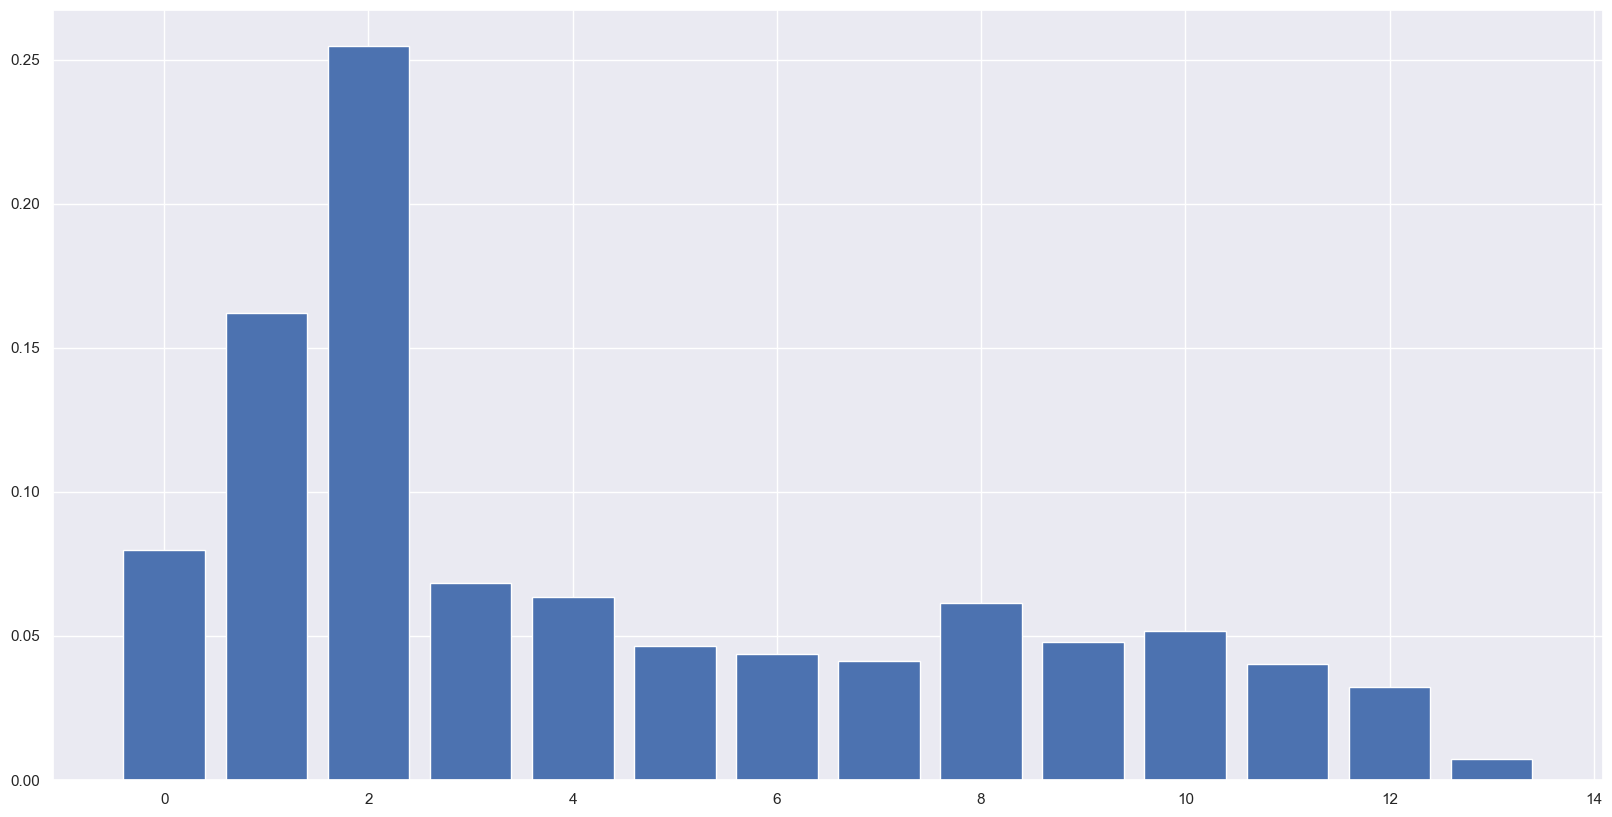

,Importance Coef,Features
2,0.254594,inflight_entertainment
1,0.161917,seat_comfort
0,0.079819,age
3,0.068416,on_board_service
4,0.063303,leg_room_service
8,0.061234,online_boarding
10,0.051750,customer_type_disloyal_customer
9,0.047906,gender_male
5,0.046305,baggage_handling
6,0.043781,checkin_service


In [18]:
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot

plt.figure(figsize=(20,10))

model = RandomForestClassifier()
model.fit(training_features, training_target)

print(model.feature_importances_)

pyplot.bar(range(len(model.feature_importances_)), model.feature_importances_)
pyplot.show()

feature_importances = pd.DataFrame({"Importance Coef" :model.feature_importances_, 'Features': training_features.columns})
feature_importances.nlargest(100, "Importance Coef")

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
sc = StandardScaler()

In [21]:
pipe = Pipeline([('scaler', sc)])

In [22]:
training_features_n = pipe.fit_transform(training_features)
test_features_n = pipe.transform(test_features)
training_features_n

array([[ 1.68684634,  0.83629557, -0.28628153, ...,  1.49528481,
         1.10822809, -0.28034259],
       [-1.74905365, -1.32173289, -1.7758802 , ...,  1.49528481,
         1.10822809, -0.28034259],
       [ 1.22432134,  0.11695275,  0.45851781, ..., -0.66876891,
        -0.90234132, -0.28034259],
       ...,
       [ 1.62077134, -1.32173289, -1.7758802 , ...,  1.49528481,
         1.10822809, -0.28034259],
       [-1.15437866,  0.11695275, -0.28628153, ...,  1.49528481,
         1.10822809, -0.28034259],
       [ 0.56357134,  1.55563839, -1.7758802 , ..., -0.66876891,
         1.10822809, -0.28034259]])

In [23]:
training_features_train, training_features_valid = training_features_n[:700], training_features_n[700:]
training_target_train, training_target_valid = training_target[:700], training_target[700:]

In [24]:
training_features.shape

(103904, 14)

## Deep Learning Model (ANN)

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
import pandas as pd
import io
import os 
import requests

from sklearn import metrics

In [28]:
import tensorflow as tf
print("Tensorflow version:" + tf.__version__)

Tensorflow version:2.12.0


In [35]:
classifier = tf.keras.Sequential()

classifier.add(tf.keras.layers.Dense(155, activation='relu', kernel_initializer='uniform', input_dim=14))

classifier.add(tf.keras.layers.Dense(55, activation='relu', kernel_initializer='uniform'))

classifier.add(tf.keras.layers.Dense(1, activation = 'sigmoid', kernel_initializer='uniform'))

classifier.add(tf.keras.layers.Dropout(0.2))

model = classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [36]:
monitor = EarlyStopping(monitor = 'val_loss', min_delta=0.0001, patience=5, mode='auto')

In [37]:
training_target_train

21413    1
7284     0
86080    0
59842    0
69486    0
        ..
12960    0
77076    0
35441    0
55297    0
33475    1
Name: satisfaction, Length: 700, dtype: int64

In [38]:
training_features_train.shape

(700, 14)

In [39]:
model_history = classifier.fit(training_features_train, training_target_train,
                              batch_size = 25, callbacks=[monitor],
                              epochs = 20,
                              validation_data = (training_features_valid, training_target_valid))

score = classifier.evaluate(training_features_valid, training_target_valid)
print("\n%s: %.2f%%" % (classifier.metrics_names[1], score[1]*100))

Epoch 1/20
28/28 [==============================] - 12s 363ms/step - loss: 2.0424 - accuracy: 0.5443 - val_loss: 0.6290 - val_accuracy: 0.8027
Epoch 2/20
28/28 [==============================] - 11s 395ms/step - loss: 2.0562 - accuracy: 0.7043 - val_loss: 0.4453 - val_accuracy: 0.8301
Epoch 3/20
28/28 [==============================] - 10s 352ms/step - loss: 1.8670 - accuracy: 0.7614 - val_loss: 0.4348 - val_accuracy: 0.8360
Epoch 4/20
28/28 [==============================] - 10s 357ms/step - loss: 1.8709 - accuracy: 0.7657 - val_loss: 0.4108 - val_accuracy: 0.8431
Epoch 5/20
28/28 [==============================] - 11s 410ms/step - loss: 1.8448 - accuracy: 0.7771 - val_loss: 0.4227 - val_accuracy: 0.8426
Epoch 6/20
28/28 [==============================] - 11s 421ms/step - loss: 1.9539 - accuracy: 0.7714 - val_loss: 0.3982 - val_accuracy: 0.8492
Epoch 7/20
28/28 [==============================] - 12s 432ms/step - loss: 2.0084 - accuracy: 0.7757 - val_loss: 0.3975 - val_accuracy: 0.8438

In [40]:
test_features.shape

(25976, 14)

In [41]:
test_features_n

array([[ 1.29039634,  0.83629557,  0.45851781, ..., -0.66876891,
        -0.90234132, -0.28034259],
       [-1.15437866, -1.32173289, -1.7758802 , ..., -0.66876891,
         1.10822809, -0.28034259],
       [ 1.02609634, -2.04107571,  1.20331714, ..., -0.66876891,
        -0.90234132, -0.28034259],
       ...,
       [-0.16325366,  0.83629557,  0.45851781, ..., -0.66876891,
         1.10822809, -0.28034259],
       [-1.15437866,  0.11695275, -0.28628153, ..., -0.66876891,
        -0.90234132, -0.28034259],
       [-1.15437866,  1.55563839,  1.20331714, ..., -0.66876891,
        -0.90234132, -0.28034259]])

In [42]:
%%time

from sklearn.metrics import accuracy_score

ANN_pred = classifier.predict(test_features_n)

ANN_pred = (ANN_pred > 0.5)

812/812 [==============================] - 2s 3ms/step
CPU times: total: 4.06 s
Wall time: 3.93 s


In [43]:
ACANN = accuracy_score(test_target, ANN_pred)
ACANN

0.8833538651062519

In [44]:
print(classifier.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 155)               2325      
                                                                 
 dense_4 (Dense)             (None, 55)                8580      
                                                                 
 dense_5 (Dense)             (None, 1)                 56        
                                                                 
 dropout_1 (Dropout)         (None, 1)                 0         
                                                                 
Total params: 10,961
Trainable params: 10,961
Non-trainable params: 0
_________________________________________________________________
None


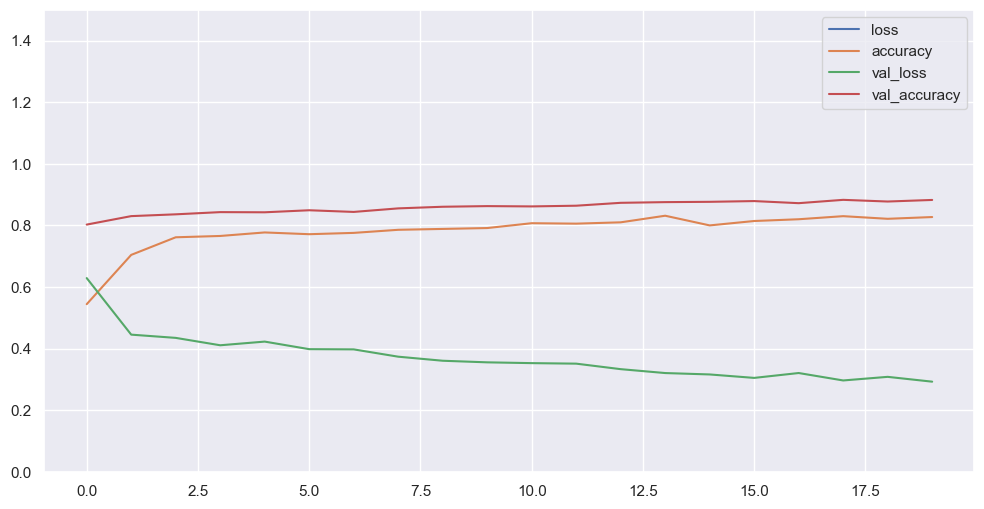

In [45]:
import pandas as pd
pd.DataFrame(model_history.history).plot(figsize=(12,6))
plt.grid(True)
plt.gca().set_ylim(0, 1.5)
plt.show()

## Save the model

In [48]:
os.chdir(r'C:\Users\NTECH\Desktop\hana\Memo')

In [49]:
os.getcwd()

'C:\\Users\\NTECH\\Desktop\\hana\\Memo'

In [50]:
classifier.save(os.path.join(os.getcwd(), 'AI_ANNModel.h5'))


In [53]:
cols = [X for X in Invistico_Airline.columns if X not in('Invistico_Airline','name')]
cols


['satisfaction',
 'age',
 'seat_comfort',
 'inflight_entertainment',
 'on_board_service',
 'leg_room_service',
 'baggage_handling',
 'checkin_service',
 'cleanliness',
 'online_boarding',
 'gender_male',
 'customer_type_disloyal_customer',
 'type_of_travel_personal_travel',
 'class_eco',
 'class_eco_plus']